In [1]:
# 라이브러리 
import numpy as np
import pandas as pd
import os

## 데이터 로드, 전처리

데이터를 불러와서 이상값이나 NaN 값이 있는지 확인

In [5]:
# 데이터 로드
data = pd.read_csv('weather_data.csv')

In [6]:
# 데이터 상위 검색 결과 확인
data.head(10)

,2����,������,�Ͻ�,��ձ��(��C),�������(��C),�ְ����(��C)
0,108,����,2011-11-08,14.9,11.1,19.6
1,108,����,2011-11-09,14.5,12.5,18.4
2,108,����,2011-11-10,14.1,10.9,17.0
3,108,����,2011-11-11,12.5,11.0,14.7
4,108,����,2011-11-12,12.0,9.1,15.8
5,108,����,2011-11-13,11.3,6.0,15.8
6,108,����,2011-11-14,6.4,3.4,11.0
7,108,����,2011-11-15,7.2,3.4,11.6
8,108,����,2011-11-16,10.9,5.8,15.7
9,108,����,2011-11-17,13.6,10.5,16.3


In [ ]:
# 데이터의 Column, 크기, 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지점        3652 non-null   int64  
 1   지점명       3652 non-null   object 
 2   일시        3652 non-null   object 
 3   평균기온(°C)  3652 non-null   float64
 4   최저기온(°C)  3652 non-null   float64
 5   최고기온(°C)  3651 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 171.3+ KB


In [ ]:
# 결측치 유무 확인
for col in data.columns:
    print("data: {:>10}\t has NULL data: {}".format(col, data[col].isnull().any()))

data:         지점	 has NULL data: False
data:        지점명	 has NULL data: False
data:         일시	 has NULL data: False
data:   평균기온(°C)	 has NULL data: False
data:   최저기온(°C)	 has NULL data: False
data:   최고기온(°C)	 has NULL data: True


In [ ]:
# 최고기온에서 결측치가 발견 되었으므로, 결측치 확인
data[data['최고기온(°C)'].isnull()]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
2165,108,서울,2017-10-12,11.4,8.8,NaN


In [ ]:
# 결측치를 전날, 다음날 최고 기온의 평균으로 처리
data['최고기온(°C)'][2165] = (data['최고기온(°C)'][2164] + data['최고기온(°C)'][2166])/2

C:\Users\tiobi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 결측치 유무 재확인
for col in data.columns:
    print("data: {:>10}\t has NULL data: {}".format(col, data[col].isnull().any()))

data:         지점	 has NULL data: False
data:        지점명	 has NULL data: False
data:         일시	 has NULL data: False
data:   평균기온(°C)	 has NULL data: False
data:   최저기온(°C)	 has NULL data: False
data:   최고기온(°C)	 has NULL data: False


## 학습용 데이터 준비 

In [ ]:
#데이터 나누기
avg_temp = data['평균기온(°C)']
hi_temp = data['최고기온(°C)']
low_temp = data['최저기온(°C)']

print("Shape of avg_temp: ", avg_temp.shape)
print("Shape of hi_temp: ", hi_temp.shape)
print("Shape of lo_temp: ", low_temp.shape)

## 데이터 시각화

In [ ]:
# 시각화 라이브러리 
import seaborn as sns
import matplotlib.pyplot as plt

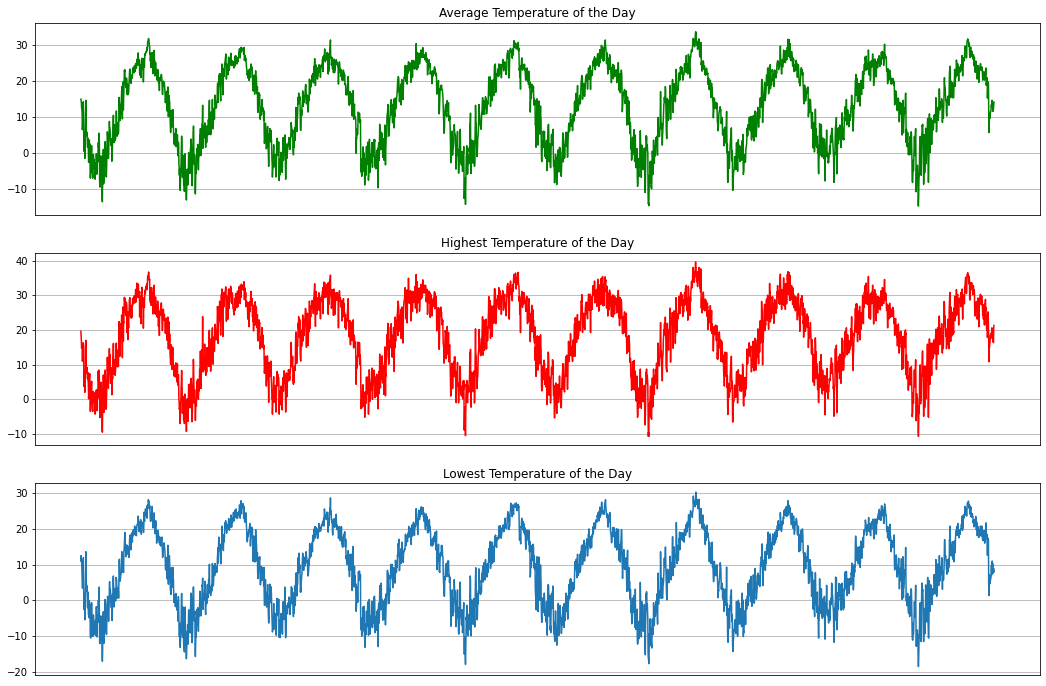

In [ ]:
# 각각의 데이터를 시각화 
fig, ax = plt.subplots(3, figsize = (18, 12))
avg_temp.plot.line(ax = ax[0], c = 'g')
ax[0].set_title('Average Temperature of the Day')
ax[0].axes.xaxis.set_visible(False)
ax[0].grid(True)

hi_temp.plot.line(ax = ax[1], c = 'r')
ax[1].set_title("Highest Temperature of the Day")
ax[1].axes.xaxis.set_visible(False)
ax[1].grid(True)

low_temp.plot.line(ax = ax[2])
ax[2].set_title("Lowest Temperature of the Day")
ax[2].axes.xaxis.set_visible(False)
ax[2].grid(True)

## train, test, validation data 전처리

In [15]:
input_data = pd.concat([hi_temp, low_temp], axis = 1)
output_data = avg_temp

print("input data shape: ", input_data.shape)
print("output data shape: ", output_data.shape)

NameError: name 'hi_temp' is not defined

In [ ]:
# 텐서 입력 형식에 맞춰 shape 변환

input_data = input_data.values.reshape((input_data.shape[0], input_data.shape[1], 1))

print("input data shape: ", input_data.shape)
print("output data shape: ", output_data.shape)

input data shape:  (3652, 2, 1)
output data shape:  (3652,)


In [ ]:
# train/test/validation 데이터 구분. 

train_data = input_data[:2500]
validation_data = input_data[2500:3000]
test_data = input_data[3000:]

train_label = output_data[:2500]
validation_label = output_data[2500:3000]
test_label = output_data[3000:]

print("train data shape: ", train_data.shape)
print("train label shape: ", train_label.shape)
print("validation data shape: ", validation_data.shape)
print("validation label shape: ", validation_label.shape)
print("test data shape: ", test_data.shape)
print("test label shape: ", test_label.shape)

train data shape:  (2500, 2, 1)
train label shape:  (2500,)
validation data shape:  (500, 2, 1)
validation label shape:  (500,)
test data shape:  (652, 2, 1)
test label shape:  (652,)


## 머신러닝

In [ ]:
# 머신러닝 라이브러리 로드

import keras
from keras.layers import Input, Embedding, LSTM, Dense, Dropout
from keras.models import Model
from keras.optimizers import RMSprop
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 케라스 Functional API 모델 구축

input_shape = (2, 1)
input_dtype = 'float64'
model_input = Input(shape = (input_shape), dtype = input_dtype)
hidden_layer1 = LSTM(10)(model_input)
dropout_layer = Dropout(0.25)(hidden_layer1)
hidden_layer2 = Dense(10, activation= 'relu')(dropout_layer)
model_output = Dense(1, activation= 'sigmoid')(hidden_layer2)

model = Model(inputs = [model_input], outputs = [model_output])

In [ ]:
# 모델 컴파일

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
# 모델 피팅, 히스토리 저장

model_hist = model.fit(train_data, train_label, batch_size = 1, epochs = 50, validation_data = (validation_data, validation_label))

Epoch 1/50
2500/2500 [==============================] - 3s 946us/step - loss: 281.5375 - val_loss: 220.4525
Epoch 2/50
2500/2500 [==============================] - 2s 787us/step - loss: 267.8488 - val_loss: 220.4419
Epoch 3/50
2500/2500 [==============================] - 2s 783us/step - loss: 260.8616 - val_loss: 220.4414
Epoch 4/50
2500/2500 [==============================] - 2s 777us/step - loss: 271.7018 - val_loss: 220.4425
Epoch 5/50
2500/2500 [==============================] - 2s 776us/step - loss: 270.0619 - val_loss: 220.4427
Epoch 6/50
2500/2500 [==============================] - 2s 779us/step - loss: 271.1654 - val_loss: 220.4437
Epoch 7/50
2500/2500 [==============================] - 2s 786us/step - loss: 264.0571 - val_loss: 220.4403
Epoch 8/50
2500/2500 [==============================] - 2s 783us/step - loss: 263.6753 - val_loss: 220.4427
Epoch 9/50
2500/2500 [==============================] - 2s 783us/step - loss: 263.2327 - val_loss: 220.4460
Epoch 10/50
2500/2500 [=====

In [ ]:
model_hist

NameError: name 'model_hist' is not defined

In [ ]:
# 모델 평가

model.evaluate(test_data, test_label)

21/21 [==============================] - 0s 748us/step - loss: 285.2082


285.20819091796875